In [8]:
import tifffile
import math
import numpy as np
import ComputeGaussianPSF as CG

import matplotlib.pyplot as plt

In [9]:
filepath = '/run/media/imaging/Elmo_Pro/SIM_Data/2022_June_SIM_data/Elyra/220615 Beads/'
filename = 'beadlawn_OMX'
infile= filepath + filename + '.tif'
my_im = tifffile.imread(infile)


In [10]:

print(my_im.shape)
dims = my_im.shape
print(dims[0])
print(dims[1])
print(dims[2])
a = (np.zeros_like(my_im)).astype(np.uint16)
print(a.shape)
offset = 0
# for i in range(15):
#     for j in range(4):
#         a[i + j*15,:,:] = my_im[i + j*15,:,:]



a = np.reshape(my_im,(3,dims[0]//15,5,dims[1],dims[2]))
a = np.swapaxes(a,0,1)
a = np.reshape(a, (dims[0], dims[1], dims[2]))
# plt.imshow(a[2,0,1]) 
outfile = filepath + filename + "_paz.tif"
# with tifffile.TiffWriter('temp.tif') as tif:
#   for i in range(4):
#     filename = f"image_{i}"
#     img = np.random.randint(0, 1023, (256, 256), 'uint16')
#     tif.save(img, photometric='minisblack', description=filename)
tifffile.imwrite(outfile,a, imagej=True)

(600, 1002, 1004)
600
1002
1004
(600, 1002, 1004)


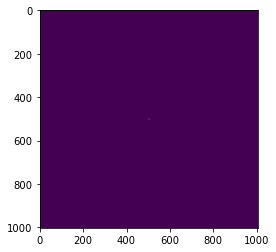

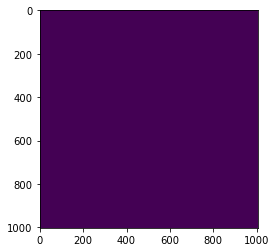

In [11]:
im_fft = np.fft.fft2(my_im[0,:,:])
im_fft_shft = np.fft.fftshift(im_fft)
# im_fft = np.fft.fftshift(my_im)
plt.imshow(np.abs(im_fft_shft))
plt.figure(2)
plt.imshow(np.abs(im_fft))